In [1]:
%matplotlib notebook

import matplotlib.pyplot as plt
import numpy as np

In [2]:
from dynetlsm.datasets import merging_dynamic_network

Y, X, z, intercept, probas, mus, sigmas = merging_dynamic_network(
    n_nodes=120, lmbda=0.6, n_time_steps=5, random_state=42)

<IPython.core.display.Javascript object>


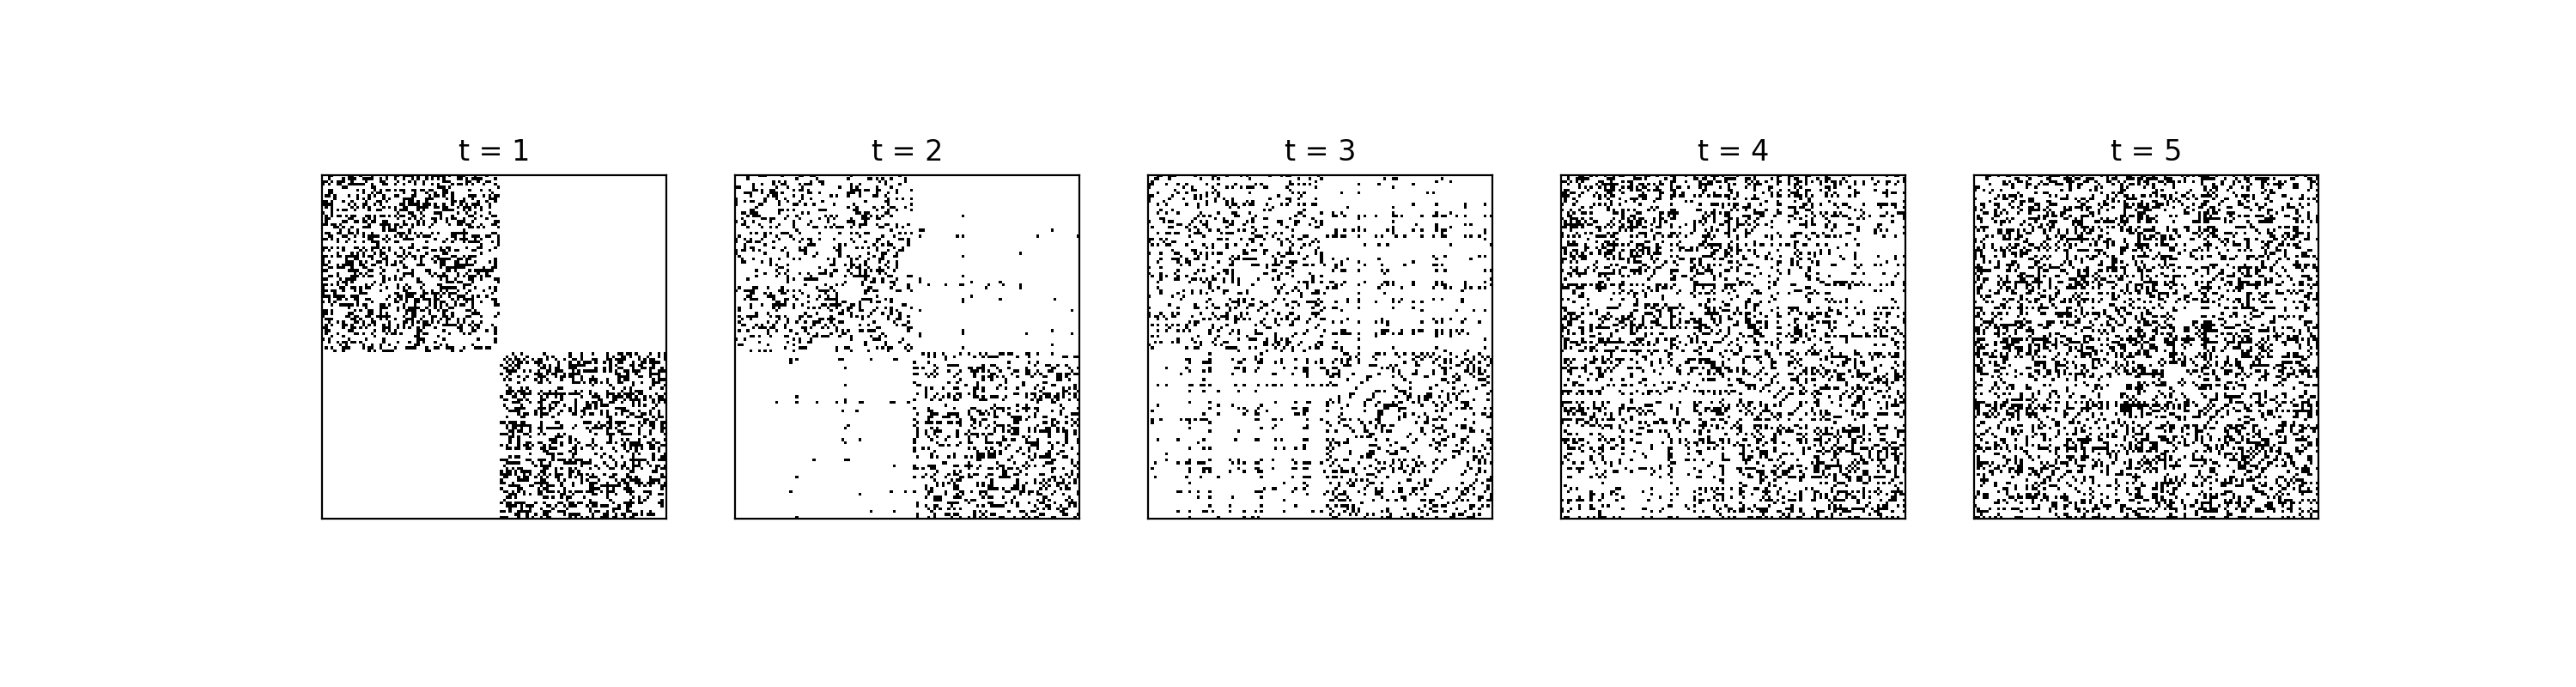

In [3]:
fig, ax = plt.subplots(figsize=(15, 4), ncols=Y.shape[0], 
                       nrows=1, sharex=True, sharey=True)
ax = ax.flat
order = np.argsort(z[0])
for t in range(Y.shape[0]):
    ax[t].imshow(Y[t][order, :][:, order], cmap='gray_r')
    ax[t].xaxis.set_visible(False)
    ax[t].yaxis.set_visible(False)
    ax[t].set_title('t = {}'.format(t+1))

In [ ]:
from dynetlsm import DynamicNetworkHDPLPCM

model = DynamicNetworkHDPLPCM(
    n_components=10, n_iter=2500, burn=2000, tune=2000, tune_interval=1000,
     random_state=123).fit(Y)

 89%|█████████████████████████████████████████████████████████████████████         | 5757/6499 [03:55<00:29, 25.28it/s]

<IPython.core.display.Javascript object>


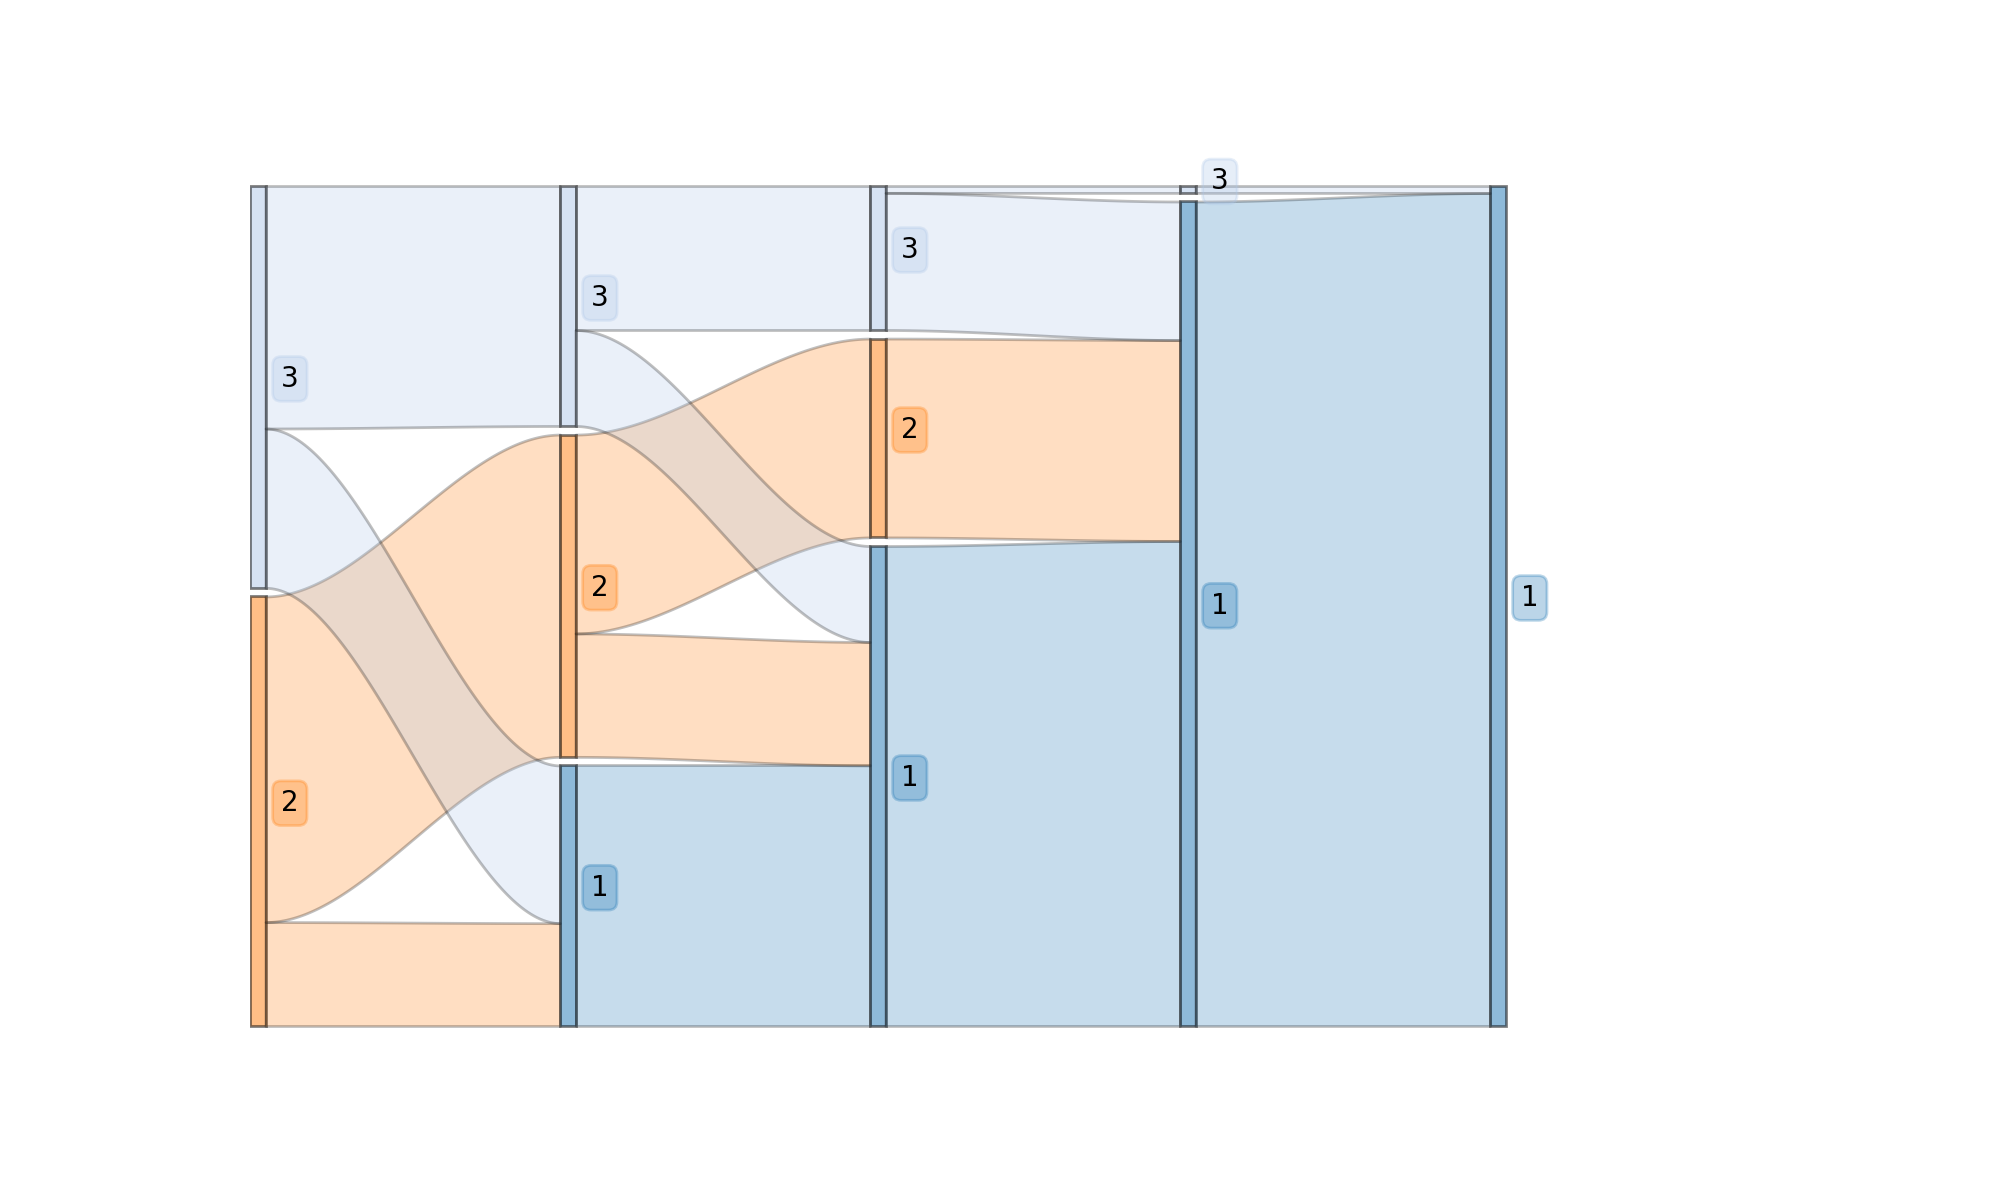

(<Figure size 1000x600 with 1 Axes>, <AxesSubplot:>)

In [5]:
from dynetlsm.plots import alluvial_plot

alluvial_plot(model.z_)

<IPython.core.display.Javascript object>


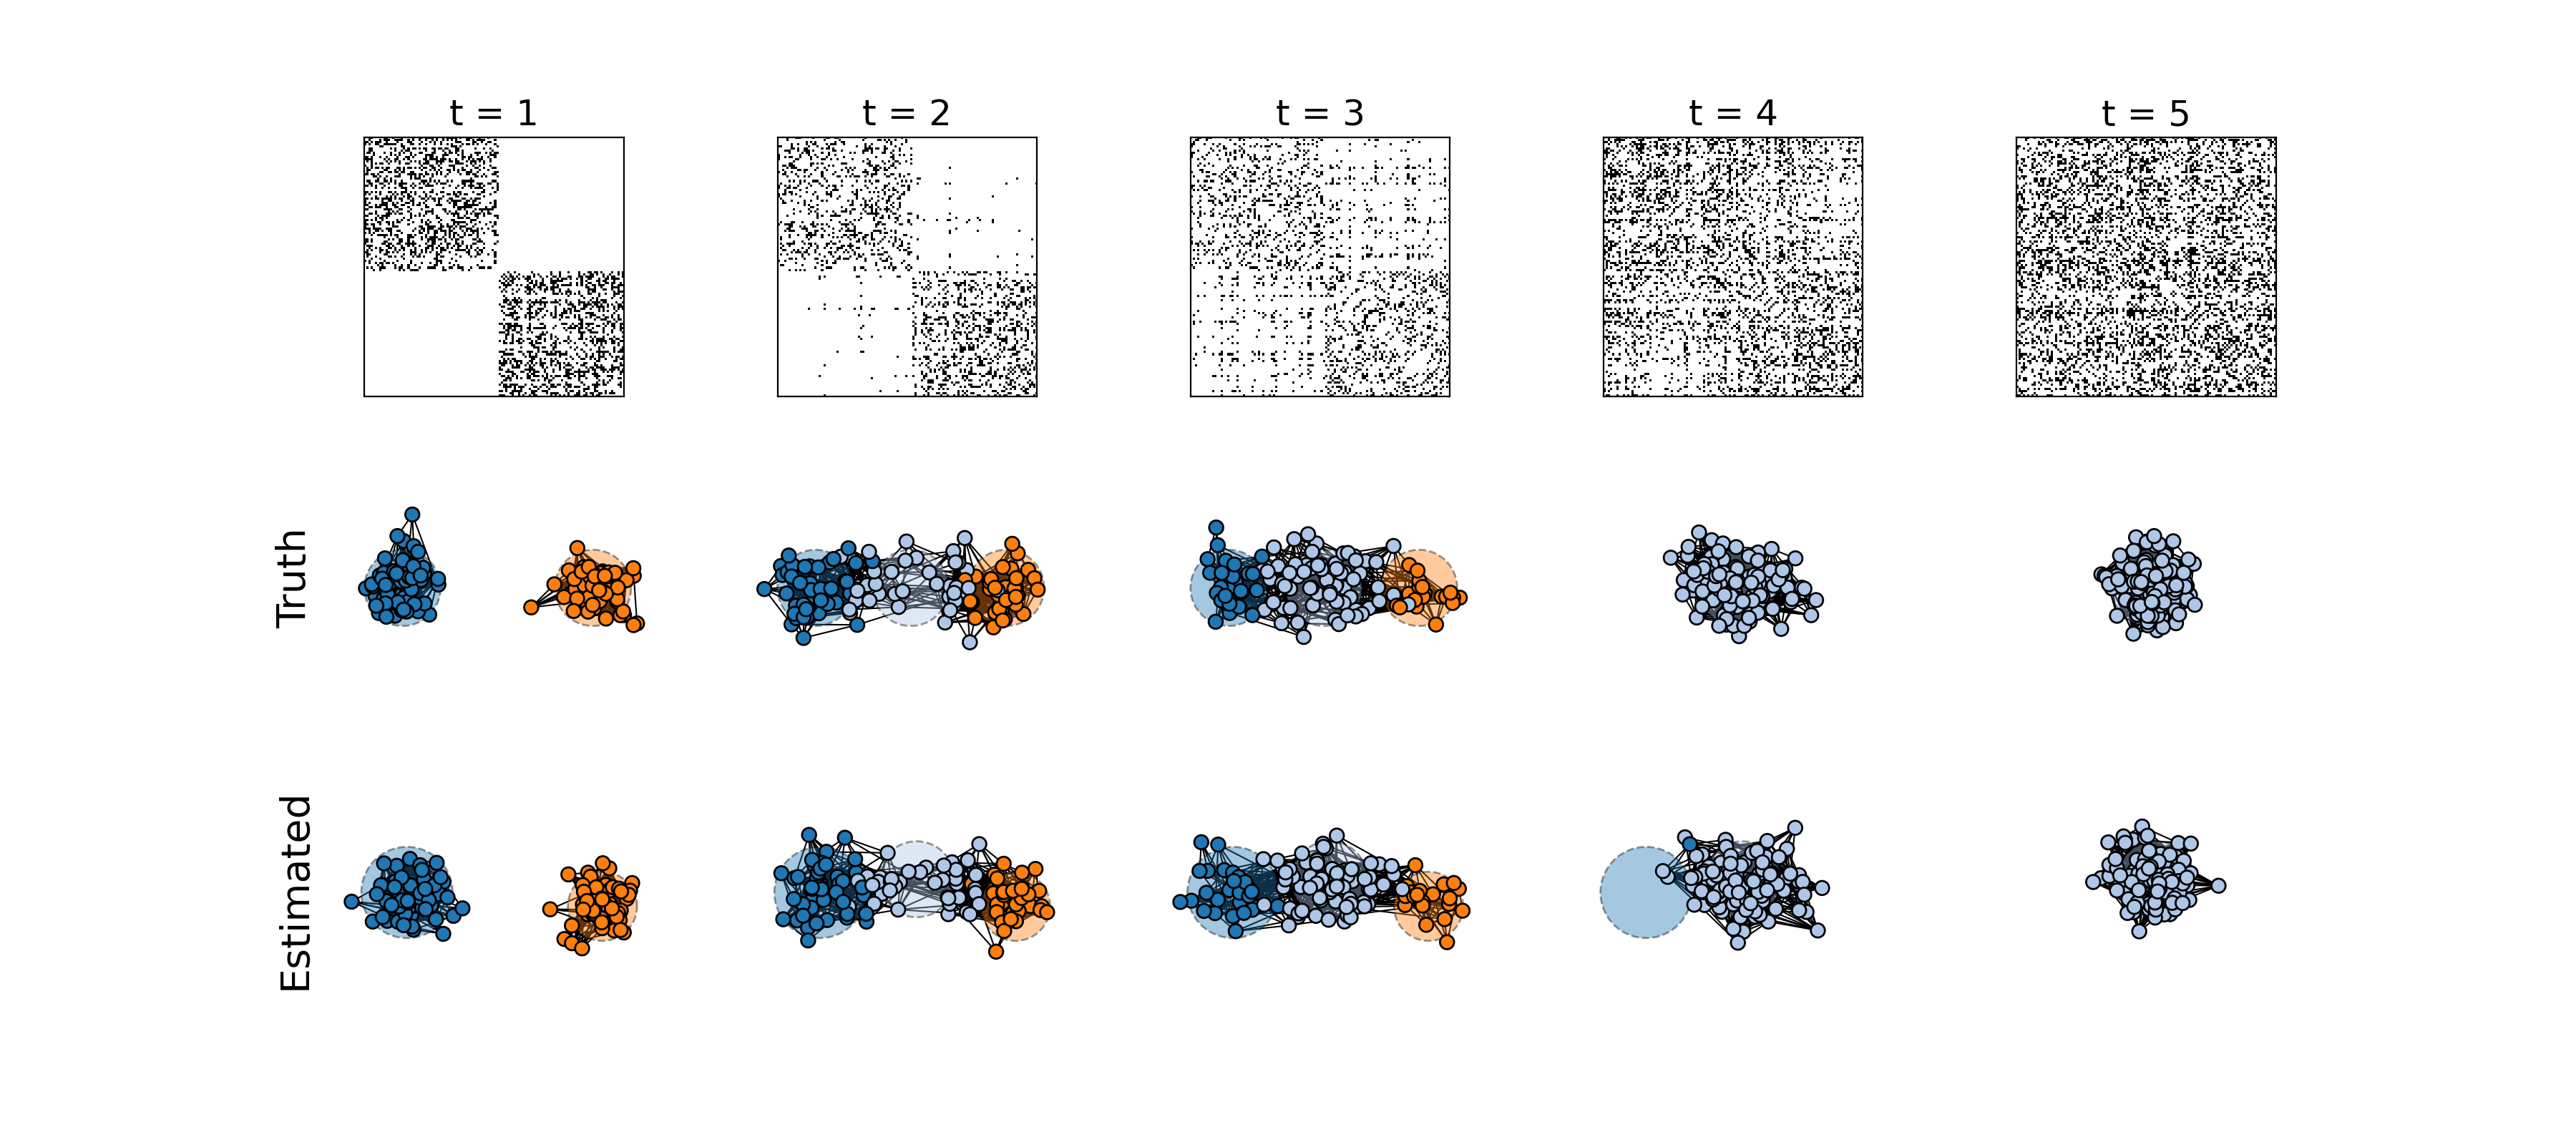

In [6]:
import networkx as nx

from dynetlsm.plots import get_colors, normal_contour
from dynetlsm.procrustes import longitudinal_procrustes_rotation

colors = get_colors(z[0])


t = 0


fig, ax = plt.subplots(figsize=(18, 8), ncols=5, nrows=3,
                       sharey='row', sharex='row', subplot_kw=dict(aspect=1))

X_rot, R = longitudinal_procrustes_rotation(X, model.X_)
mu_rot = np.dot(model.mu_, R)


order = np.argsort(z[0])
for t in range(Y.shape[0]):
    ax[0, t].imshow(Y[t][order, :][:, order], cmap='gray_r')
    ax[0, t].xaxis.set_visible(False)
    ax[0, t].yaxis.set_visible(False)
    ax[0, t].set_title('t = {}'.format(t+1), fontsize=18)

    
for t in range(Y.shape[0]):
    pos = dict()
    for i in range(Y.shape[1]):
        pos[i] = X[t, i]
    
    G = nx.from_numpy_array(Y[t])
    
    nx.draw(G, pos=pos, 
        node_color=colors[z[t]], 
        edge_color='k', edgecolors='k',
        node_size=50,
        width=0.75, ax=ax[1, t])

    for k in np.unique(z[t]):
        normal_contour(mus[k], sigmas[k] * np.eye(2), ax=ax[1, t], n_std=[2],
                   zorder=1, alpha=0.4, facecolor=colors[k], linestyle='--',
                   linewidth=1, edgecolor='k')

    #ax.set_aspect('equal', 'box')
    #ax[0, t].set_title('t = {}'.format(t + 1), fontsize=16)
    
    if t == 0:
        ax[1, t].axis('on')
        ax[1, t].spines['top'].set_visible(False)
        ax[1, t].spines['right'].set_visible(False)
        ax[1, t].spines['bottom'].set_visible(False)
        ax[1, t].spines['left'].set_visible(False)
        ax[1, t].set_ylabel('Truth', fontsize=20)
    
    ax[1, t].margins(y=0.1)

for t in range(Y.shape[0]):
    pos = dict()
    for i in range(Y.shape[1]):
        pos[i] = X_rot[t, i]
    
    G = nx.from_numpy_array(Y[t])
    
    nx.draw(G, pos=pos, 
        node_color=colors[model.z_[t]], 
        edge_color='k', edgecolors='k',
        node_size=50,
        width=0.75, ax=ax[2, t])

    for k in np.unique(model.z_[t]):
        normal_contour(mu_rot[k], model.sigma_[k] * np.eye(2), ax=ax[2, t], n_std=[2],
                   zorder=1, alpha=0.4, facecolor=colors[k], linestyle='--',
                   linewidth=1, edgecolor='k')

    if t == 0:
        ax[2, t].axis('on')
        ax[2, t].spines['top'].set_visible(False)
        ax[2, t].spines['right'].set_visible(False)
        ax[2, t].spines['bottom'].set_visible(False)
        ax[2, t].spines['left'].set_visible(False)
        ax[2, t].set_ylabel('Estimated', fontsize=20)
    
    ax[2, t].margins(y=0.1)

In [7]:
np.quantile(model.lambdas_[model.n_burn_:], q=[0.025, 0.975])

array([0.58992163, 0.66728575])

In [8]:
from sklearn.metrics import adjusted_rand_score

adjusted_rand_score(z.ravel(), model.z_.ravel())

0.930790524133893